In [1]:
import os
import re
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import regex
from chemformula import ChemFormula as cf
%matplotlib inline

In [1]:
def plot_NIST(collected_data, vf): 
    
    #start the plotting stuff
    fig, ax = plt.subplots()
    plt.xlabel(r'Normalized sensitivity coefficient, $s_{i}$', fontsize=15)
    plt.title(f'NIST')
    
    for (eq, sens) in collected_data: 
        ax.barh(eq, sens, color='tab:blue', align='center')
        
    

In [2]:
#PLOTTING SECTION
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.autolayout'] = True
matplotlib.rcParams['font.family'] = 'serif'

In [3]:
duplicates = []
#let's track how sensitivities change across 2-BTP volume fractions 

NIST_csvs = [file for file in os.listdir('.') if 'cti' in file]
equations_ = []

for file in [NIST_csvs[0]]: 

    df = pd.read_csv(f'./{file}')
    #now we will collect data to plot 
    
    for index, row in df.iterrows(): 
        sens, eq = row['sensitivity'], row['cantera equation']
        if eq not in equations_: 
            equations_.append(eq)
        else:
            duplicates.append(eq)
        
        

In [5]:
duplicates

['CO + OH <=> CO2 + H',
 'HO2 + OH <=> H2O + O2',
 'HO2 + OH <=> H2O + O2',
 'HO2 + OH <=> H2O + O2',
 'CF2:CH + O2 <=> CF2:O + HCO',
 'CF2:O + H <=> CF:O + HF',
 'H2O2 + OH <=> H2O + HO2',
 '2 HO2 <=> H2O2 + O2',
 'CH2:CF + O2 <=> CF:O + CH2O',
 'CF2:O + H <=> CF:O + HF',
 'HO2 + OH <=> H2O + O2',
 'CHF:CH[Z] + O2 <=> CHF:O + HCO',
 'C4H81 + O <=> C4H7 + OH',
 'C5H6 + O <=> C5H5O(1,3) + H',
 'C5H5 + OH <=> C5H5OH',
 'C5H5 + OH <=> C5H5OH',
 'CF2:CF + O2 <=> CF2:O + CF:O',
 'CHF:CF[Z] + O2 <=> CF:O + CHF:O',
 'CH3CHOH + O2 <=> CH3CHO + HO2']

In [7]:
#let's track how sensitivities change across 2-BTP volume fractions 

NIST_csvs = [file for file in os.listdir('.') if 'cti' in file]

collected_data_across_vf = {}


for file in NIST_csvs: 

    df = pd.read_csv(f'./{file}')
    vf = re.search('cti_(\S+)_subtract_sens_NIST', file).group(1)
    #now we will collect data to plot 
    
    for index, row in df.iterrows(): 
            sens, eq = row['sensitivity'], row['cantera equation']
            if eq in duplicates: 
                continue
            if eq not in collected_data_across_vf.keys(): 
                collected_data_across_vf[eq]=[sens]
            else: 
                sens_list = collected_data_across_vf[eq]
                sens_list.append(sens)
                collected_data_across_vf[eq]=sens_list

    
        

In [8]:
eq_and_their_totals = {}


for eq, sens_list in collected_data_across_vf.items():
    abs_value_total = sum([abs(x) for x in sens_list])
    eq_and_their_totals[eq]=abs_value_total
    
sorted_totals = sorted(eq_and_their_totals.items(), key=lambda x:x[1], reverse=True)

In [9]:
sorted_totals

[('H + O2 <=> O + OH', 3.428745155436128),
 ('BR + HCO <=> CO + HBR', 1.0478601911663457),
 ('HCO + M <=> CO + H + M', 0.7271964507658022),
 ('2 CH3 <=> C2H5 + H', 0.39459320674220794),
 ('C2H3 (+M) <=> C2H2 + H (+M)', 0.29617873546576967),
 ('H2O + HCO <=> CO + H + H2O', 0.25204963620880566),
 ('CH3BR <=> BR + CH3', 0.2399277617657237),
 ('CH3 + O <=> CH2O + H', 0.22992784014163192),
 ('2 BR + M <=> BR2 + M', 0.22017604380984318),
 ('H + HBR <=> BR + H2', 0.2197718803158296),
 ('BR + C2H3 <=> C2H3BR', 0.20411995103726818),
 ('CF3 + CH3 <=> CH2:CF2 + HF', 0.20229662348634403),
 ('H + O2 (+M) <=> HO2 (+M)', 0.1902306763631902),
 ('C2H2 + O <=> H + HCCO', 0.1838540315988754),
 ('HCCO + O2 <=> 2 CO + OH', 0.17490539758101098),
 ('BR + HO2 <=> HBR + O2', 0.1627746981920704),
 ('CH2 + O2 <=> HCO + OH', 0.1582537519346186),
 ('HCO + O2 <=> CO + HO2', 0.15033105347814849),
 ('CH2 + O2 <=> CO2 + 2 H', 0.14308221518154662),
 ('CH2* + O2 <=> CO + H + OH', 0.1331962753673658),
 ('BROH (+M) <=> BR

In [28]:
low_sens = []
middle_sens = []
second_hi_sens = []
high_sens = []
equations = []

for (eq, total) in sorted_totals[0:25]:
    if ('BR'in eq) or ('F' in eq):
        print(eq, total)
        sens_list = collected_data_across_vf[eq]
        lo, mid, second_hi, hi = sens_list[0], sens_list[3], sens_list[6], sens_list[-1]
        low_sens.append(lo)
        middle_sens.append(mid)
        second_hi_sens.append(second_hi)
        high_sens.append(hi)
        equations.append(eq)

        

BR + HCO <=> CO + HBR 1.0478601911663457
CH3BR <=> BR + CH3 0.2399277617657237
2 BR + M <=> BR2 + M 0.22017604380984318
H + HBR <=> BR + H2 0.2197718803158296
BR + C2H3 <=> C2H3BR 0.20411995103726818
CF3 + CH3 <=> CH2:CF2 + HF 0.20229662348634403
BR + HO2 <=> HBR + O2 0.1627746981920704
BROH (+M) <=> BR + OH (+M) 0.13069165760453785
CH3BR + H <=> CH3 + HBR 0.1207549903755287
CF + O2 <=> CF:O + O 0.11913236090206561


In [29]:
# equations= ['Br + HCO ⇌ CO + HBr',
#  'CH3Br ⇌ Br + CH3',
#  'H + HBr ⇌ Br + H2',
#  '2 Br + M ⇌ Br2 + M',
#  'Br + C2H3 ⇌ C2H3Br',
#  'CF3 + CH3 ⇌ CH2CF2 + HF',
#  'Br + HO2 ⇌ HBr + O2',
#  'BrOH (+M) ⇌ Br + OH (+M)',
#  'CH3Br + H ⇌ CH3 + HBr',
#  'CF + O2 ⇌ CFO + O']
equations= ['Br + HCO ⇌ CO + HBr',
'CH3Br ⇌ Br + CH3',
'2 Br + M ⇌ Br2 + M',
'H + HBr ⇌ Br + H2',
'Br + C2H3 ⇌ C2H3Br',
'CF3 + CH3 ⇌ CH2CF2 + HF',
'Br + HO2 ⇌ HBr + O2',
'BrOH (+M) ⇌ Br + OH (+M)',
'CH3Br + H ⇌ CH3 + HBr',
'CF + O2 ⇌ CFO + O']


In [21]:
def format_with_cf(rxn): 
    """ change the equation so it is formatted""" 
    changing_names = {}
    for spec in rxn.split(): 
        if regex.search('[A-Z][0-9]', spec):
            changing_names[spec]=cf(spec).unicode
    #now cycle through to change the equation 
    for old_name, new_name in changing_names.items():
        rxn=rxn.replace(old_name, new_name)
    return rxn

In [30]:
form_eq = [format_with_cf(eq) for eq in equations]

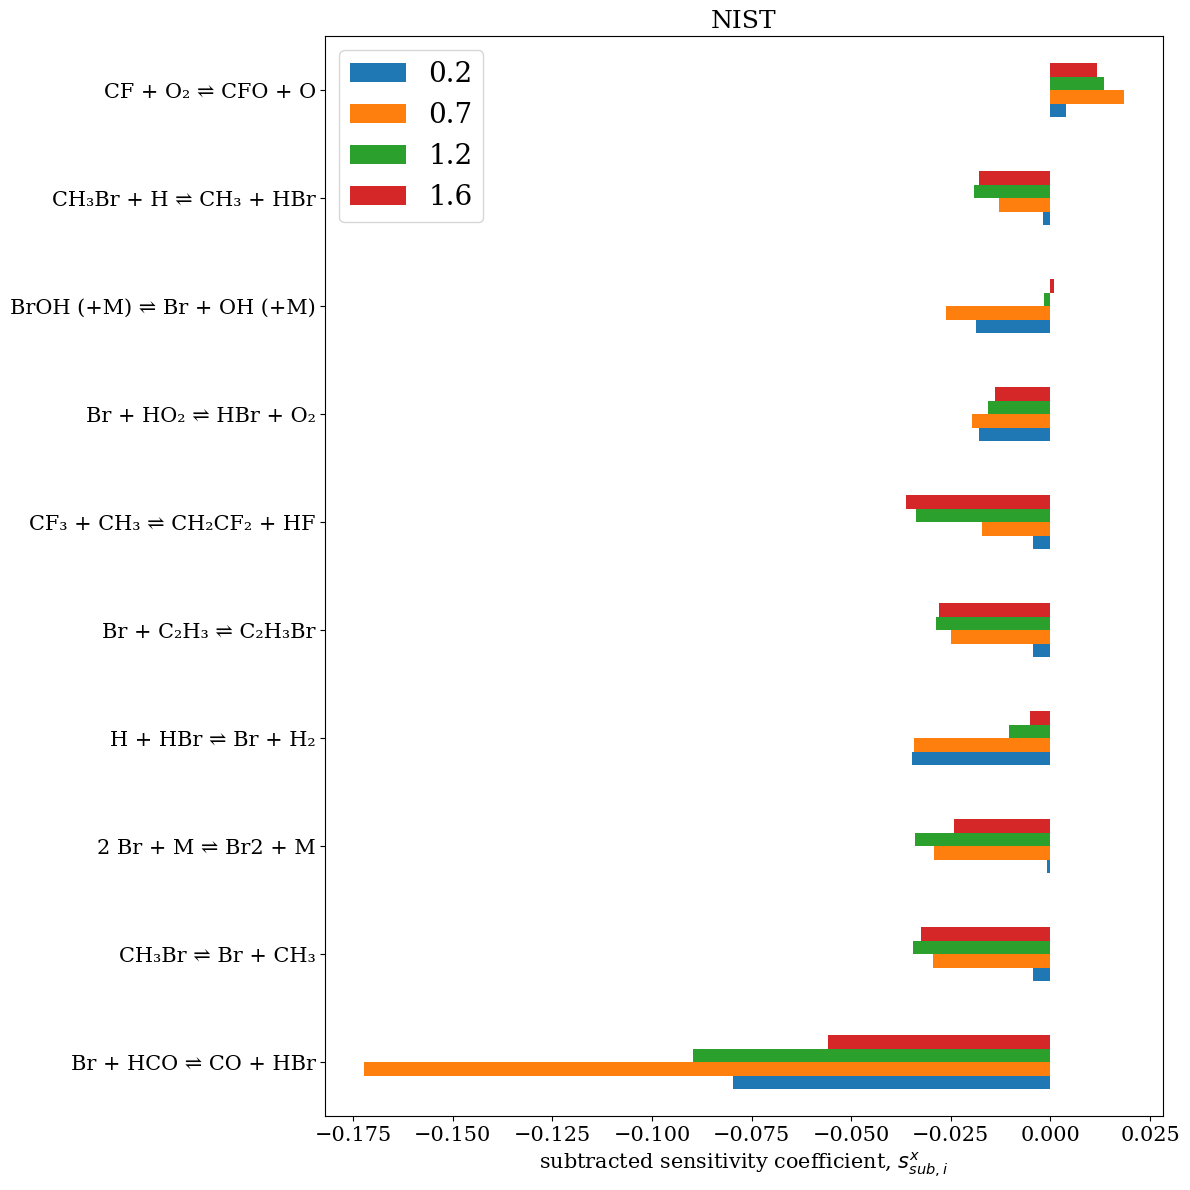

In [32]:
df_final = pd.DataFrame({'0.2': low_sens,
                         '0.7': middle_sens,
                         '1.2': second_hi_sens, 
                         '1.6': high_sens}, index=form_eq)
ax = df_final.plot.barh(figsize=(12,12))
ax.set_xlabel(r'subtracted sensitivity coefficient, $s^{x}_{sub, i}$', fontsize=15)
ax.legend(fontsize=20)
plt.title('NIST', fontsize=18)
plt.savefig('Updated_Figure_6.pdf', format='pdf')
